In [1]:
path_lwf = '/home/karokaro/research-repositories/FACIL/results/svhn_lwf_final_svhn'

In [ ]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(path_lwf) if isfile(join(path_lwf, f))]
onlyfiles

['args-2025-01-23-16-07.txt',
 'raw_log-2025-01-23-15-35.txt',
 'args-2025-01-23-15-17.txt',
 'args-2025-01-23-15-26.txt',
 'stdout-2025-01-23-16-21.txt',
 'raw_log-2025-01-23-15-17.txt',
 'raw_log-2025-01-23-15-26.txt',
 'stdout-2025-01-23-15-51.txt',
 'stderr-2025-01-23-15-26.txt',
 'stderr-2025-01-23-15-35.txt',
 'raw_log-2025-01-23-15-43.txt',
 'stdout-2025-01-23-15-59.txt',
 'stderr-2025-01-23-15-17.txt',
 'raw_log-2025-01-23-16-07.txt',
 'raw_log-2025-01-23-15-51.txt',
 'args-2025-01-23-15-51.txt',
 'stdout-2025-01-23-15-26.txt',
 'stdout-2025-01-23-15-17.txt',
 'raw_log-2025-01-23-16-14.txt',
 'stderr-2025-01-23-15-51.txt',
 'stderr-2025-01-23-15-43.txt',
 'args-2025-01-23-15-43.txt',
 'stderr-2025-01-23-15-59.txt',
 'stderr-2025-01-23-16-21.txt',
 'args-2025-01-23-15-59.txt',
 'raw_log-2025-01-23-16-21.txt',
 'args-2025-01-23-16-21.txt',
 'stdout-2025-01-23-16-07.txt',
 'stderr-2025-01-23-16-14.txt',
 'args-2025-01-23-15-35.txt',
 'raw_log-2025-01-23-15-59.txt',
 'stdout-2025-0

In [3]:
args = [file for file in onlyfiles if 'args' in file ]
len(args)

9

In [4]:
import json
arg_dict = {}
for file in args:
    with open(join(path_lwf, file), 'r') as f:
        # regex time! we need only the timestamp of the file
        name = file.split('args-')[1]
        arg_dict[name] = json.loads(f.read())

In [5]:
import json

logs = [file for file in onlyfiles if 'raw_log' in file ]

res_dict = {}
for file in logs:
    with open(join(path_lwf, file), 'r') as f:
        name = file.split('raw_log-')[1]
        res_dict[name] = []
        for line in f:
            res_dict[name].append(json.loads(line.strip()))

In [6]:
import numpy as np
seeds = [0, 1, 2]
for seed in seeds:
    small = [key for key in arg_dict if arg_dict[key]["seed"]==seed]
    arg_means = {key:[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in [4]] for key in small}
    max_key = max(arg_means, key=arg_means.get)
    small.remove(max_key)
    for key in small:
        res_dict.pop(key)
        arg_dict.pop(key)

In [7]:
import pandas as pd
import numpy as np
from itertools import chain
data = pd.DataFrame({'Approach': list(chain.from_iterable([['LWF' for i in range(5)] for key in res_dict.keys()])),
                     'Task': list(chain.from_iterable([[i for i in range(5)] for key in res_dict.keys()])),
                     'Average Accuracy': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_taw" and k["group"]=="test" and k["task"] == i]) for i in range(5)] for key in res_dict.keys()])),
                     'Average Forgetting': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="forg_taw" and k["group"]=="test" and k["task"] == i and k["iter"] != k["task"]]) for i in range(5)] for key in res_dict.keys()]))})

/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


<Axes: xlabel='Task', ylabel='Average Accuracy'>

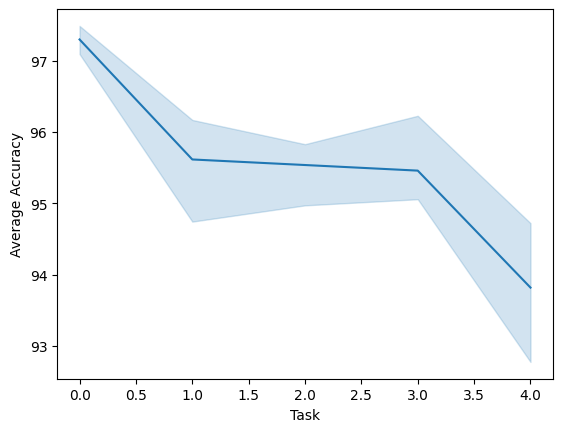

In [8]:
import seaborn as sns
sns.lineplot( data,  x='Task', y='Average Accuracy')

In [9]:
data.groupby(['Approach', 'Task']).mean().apply(lambda x: round(x, 2))

Average Accuracy  Average Forgetting
Approach Task                                      
LWF      0                97.30                 NaN
         1                95.62               -0.09
         2                95.54                0.60
         3                95.46                1.30
         4                93.82                2.72

In [10]:
path_ewc = '/home/karokaro/research-repositories/FACIL/results/svhn_ewc_final_svhn'

In [11]:
onlyfiles = [f for f in listdir(path_ewc) if isfile(join(path_ewc, f))]
args = [file for file in onlyfiles if 'args' in file ]
len(args)

9

In [12]:
import json
arg_dict = {}
for file in args:
    with open(join(path_ewc, file), 'r') as f:
        # regex time! we need only the timestamp of the file
        name = file.split('args-')[1]
        arg_dict[name] = json.loads(f.read())

In [13]:
import json

logs = [file for file in onlyfiles if 'raw_log' in file ]

res_dict = {}
for file in logs:
    with open(join(path_ewc, file), 'r') as f:
        name = file.split('raw_log-')[1]
        res_dict[name] = []
        for line in f:
            res_dict[name].append(json.loads(line.strip()))

In [14]:
import numpy as np
seeds = [0, 1, 2]
for seed in seeds:
    small = [key for key in arg_dict if arg_dict[key]["seed"]==seed]
    arg_means = {key:[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in [4]] for key in small}
    max_key = max(arg_means, key=arg_means.get)
    small.remove(max_key)
    for key in small:
        res_dict.pop(key)
        arg_dict.pop(key)

In [ ]:
data_ewc = pd.DataFrame({'Approach': list(chain.from_iterable([['EWC' for i in range(5)] for key in res_dict.keys()])),
                     'Task': list(chain.from_iterable([[i for i in range(5)] for key in res_dict.keys()])),
                     'Average Accuracy': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_taw" and k["group"]=="test" and k["task"] == i]) for i in range(5)] for key in res_dict.keys()])),
                     'Average Forgetting': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="forg_taw" and k["group"]=="test" and k["task"] == i and k["iter"] != k["task"]]) for i in range(5)] for key in res_dict.keys()]))})

/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


<Axes: xlabel='Task', ylabel='Average Accuracy'>

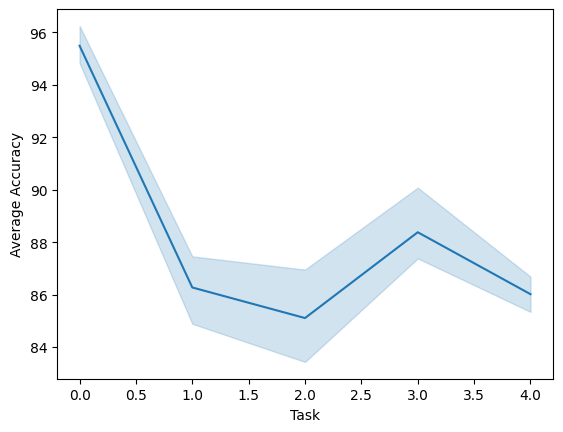

In [16]:
sns.lineplot( data_ewc,  x='Task', y='Average Accuracy')

In [17]:
data_ewc.groupby(['Approach', 'Task']).mean().apply(lambda x: round(x, 2))

Average Accuracy  Average Forgetting
Approach Task                                      
EWC      0                95.49                 NaN
         1                86.27                5.51
         2                85.11                6.27
         3                88.38                2.03
         4                86.02                4.81

In [18]:
path_lwm = '/home/karokaro/research-repositories/FACIL/results/svhn_lwm_final_svhn'

In [19]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(path_lwm) if isfile(join(path_lwm, f))]
onlyfiles

['raw_log-2025-01-24-08-16.txt',
 'stderr-2025-01-24-07-55.txt',
 'raw_log-2025-01-24-07-55.txt',
 'raw_log-2025-01-24-07-47.txt',
 'stdout-2025-01-24-09-03.txt',
 'args-2025-01-24-08-44.txt',
 'stderr-2025-01-24-09-03.txt',
 'args-2025-01-24-08-25.txt',
 'stderr-2025-01-24-08-44.txt',
 'stderr-2025-01-24-08-35.txt',
 'args-2025-01-24-09-03.txt',
 'stderr-2025-01-24-08-06.txt',
 'stderr-2025-01-24-08-54.txt',
 'raw_log-2025-01-24-08-54.txt',
 'raw_log-2025-01-24-08-06.txt',
 'stderr-2025-01-24-07-47.txt',
 'stdout-2025-01-24-08-35.txt',
 'args-2025-01-24-08-16.txt',
 'stdout-2025-01-24-08-44.txt',
 'stdout-2025-01-24-08-06.txt',
 'stderr-2025-01-24-08-16.txt',
 'raw_log-2025-01-24-08-25.txt',
 'args-2025-01-24-08-35.txt',
 'stdout-2025-01-24-08-54.txt',
 'stdout-2025-01-24-07-55.txt',
 'stdout-2025-01-24-08-25.txt',
 'stderr-2025-01-24-08-25.txt',
 'raw_log-2025-01-24-08-44.txt',
 'stdout-2025-01-24-08-16.txt',
 'raw_log-2025-01-24-09-03.txt',
 'args-2025-01-24-07-47.txt',
 'args-2025-

In [20]:
args = [file for file in onlyfiles if 'args' in file ]
len(args)

9

In [21]:
import json
arg_dict = {}
for file in args:
    with open(join(path_lwm, file), 'r') as f:
        # regex time! we need only the timestamp of the file
        name = file.split('args-')[1]
        arg_dict[name] = json.loads(f.read())

In [22]:
import json

logs = [file for file in onlyfiles if 'raw_log' in file ]

res_dict = {}
for file in logs:
    with open(join(path_lwm, file), 'r') as f:
        name = file.split('raw_log-')[1]
        res_dict[name] = []
        for line in f:
            res_dict[name].append(json.loads(line.strip()))

In [23]:
import numpy as np
seeds = [0, 1, 2]
for seed in seeds:
    small = [key for key in arg_dict if arg_dict[key]["seed"]==seed]
    arg_means = {key:[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in [4]] for key in small}
    max_key = max(arg_means, key=arg_means.get)
    small.remove(max_key)
    for key in small:
        res_dict.pop(key)
        arg_dict.pop(key)

In [24]:
import pandas as pd
import numpy as np
from itertools import chain
data_lwm = pd.DataFrame({'Approach': list(chain.from_iterable([['LWM' for i in range(5)] for key in res_dict.keys()])),
                     'Task': list(chain.from_iterable([[i for i in range(5)] for key in res_dict.keys()])),
                     'Average Accuracy': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_taw" and k["group"]=="test" and k["task"] == i]) for i in range(5)] for key in res_dict.keys()])),
                     'Average Forgetting': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="forg_taw" and k["group"]=="test" and k["task"] == i and k["iter"] != k["task"]]) for i in range(5)] for key in res_dict.keys()]))})

/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


<Axes: xlabel='Task', ylabel='Average Accuracy'>

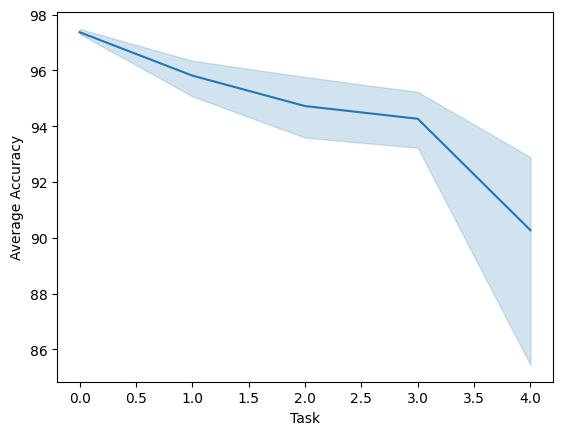

In [25]:
sns.lineplot( data_lwm,  x='Task', y='Average Accuracy')

In [26]:
data_lwm.groupby(['Approach', 'Task']).mean().apply(lambda x: round(x, 2))

Average Accuracy  Average Forgetting
Approach Task                                      
LWM      0                97.37                 NaN
         1                95.81               -0.01
         2                94.72                1.65
         3                94.27                2.71
         4                90.27                3.25

In [27]:
path_icarl = '/home/karokaro/research-repositories/FACIL/results/svhn_icarl_final_svhn_new'

In [28]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(path_icarl) if isfile(join(path_icarl, f))]
onlyfiles

['raw_log-2025-01-18-20-29.txt',
 'stderr-2025-01-18-20-43.txt',
 'stderr-2025-01-18-20-25.txt',
 'stdout-2025-01-18-20-43.txt',
 'stdout-2025-01-18-20-21.txt',
 'args-2025-01-18-20-21.txt',
 'stdout-2025-01-18-20-25.txt',
 'raw_log-2025-01-18-20-13.txt',
 'raw_log-2025-01-18-20-17.txt',
 'args-2025-01-18-20-43.txt',
 'stderr-2025-01-18-20-38.txt',
 'stderr-2025-01-18-20-21.txt',
 'args-2025-01-18-20-33.txt',
 'stderr-2025-01-18-20-29.txt',
 'args-2025-01-18-20-25.txt',
 'raw_log-2025-01-18-20-33.txt',
 'args-2025-01-18-20-38.txt',
 'stdout-2025-01-18-20-17.txt',
 'stderr-2025-01-18-20-13.txt',
 'raw_log-2025-01-18-20-43.txt',
 'args-2025-01-18-20-17.txt',
 'args-2025-01-18-20-29.txt',
 'stdout-2025-01-18-20-13.txt',
 'stdout-2025-01-18-20-29.txt',
 'stdout-2025-01-18-20-38.txt',
 'stdout-2025-01-18-20-33.txt',
 'raw_log-2025-01-18-20-21.txt',
 'args-2025-01-18-20-13.txt',
 'raw_log-2025-01-18-20-25.txt',
 'raw_log-2025-01-18-20-38.txt',
 'stderr-2025-01-18-20-33.txt',
 'stderr-2025-01

In [29]:
args = [file for file in onlyfiles if 'args' in file ]
len(args)

8

In [30]:
import json
arg_dict = {}
for file in args:
    with open(join(path_icarl, file), 'r') as f:
        # regex time! we need only the timestamp of the file
        name = file.split('args-')[1]
        arg_dict[name] = json.loads(f.read())

In [31]:
import json

logs = [file for file in onlyfiles if 'raw_log' in file ]

res_dict = {}
for file in logs:
    with open(join(path_icarl, file), 'r') as f:
        name = file.split('raw_log-')[1]
        res_dict[name] = []
        for line in f:
            res_dict[name].append(json.loads(line.strip()))

In [32]:
import numpy as np
seeds = [0, 1, 2]
for seed in seeds:
    small = [key for key in arg_dict if arg_dict[key]["seed"]==seed]
    arg_means = {key:[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in [4]] for key in small}
    max_key = max(arg_means, key=arg_means.get)
    small.remove(max_key)
    for key in small:
        res_dict.pop(key)
        arg_dict.pop(key)

In [33]:
import pandas as pd
import numpy as np
from itertools import chain
data_icarl = pd.DataFrame({'Approach': list(chain.from_iterable([['iCaRL' for i in range(5)] for key in res_dict.keys()])),
                     'Task': list(chain.from_iterable([[i for i in range(5)] for key in res_dict.keys()])),
                     'Average Accuracy': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_taw" and k["group"]=="test" and k["task"] == i]) for i in range(5)] for key in res_dict.keys()])),
                     'Average Forgetting': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="forg_taw" and k["group"]=="test" and k["task"] == i and k["iter"] != k["task"]]) for i in range(5)] for key in res_dict.keys()]))})

/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [34]:
data_icarl.groupby(['Approach', 'Task']).mean().apply(lambda x: round(x, 2))

Average Accuracy  Average Forgetting
Approach Task                                      
iCaRL    0                93.86                 NaN
         1                94.38               -0.49
         2                92.58                3.68
         3                92.12                4.66
         4                86.00               11.34

In [35]:
path_rere = '/home/karokaro/research-repositories/FACIL/results/svhn_rere_lrp_final_svhn'

In [36]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(path_rere) if isfile(join(path_rere, f))]
onlyfiles

['stdout-2025-01-21-20-30.txt',
 'args-2025-01-22-01-13.txt',
 'stderr-2025-01-23-02-52.txt',
 'stdout-2025-01-22-07-35.txt',
 'stderr-2025-01-22-11-27.txt',
 'raw_log-2025-01-22-23-05.txt',
 'stdout-2025-01-23-02-52.txt',
 'stderr-2025-01-22-23-05.txt',
 'args-2025-01-22-07-35.txt',
 'raw_log-2025-01-22-15-13.txt',
 'stdout-2025-01-22-01-13.txt',
 'stderr-2025-01-22-15-13.txt',
 'stdout-2025-01-22-15-13.txt',
 'stderr-2025-01-21-20-30.txt',
 'raw_log-2025-01-22-01-13.txt',
 'stdout-2025-01-22-04-51.txt',
 'stderr-2025-01-22-04-51.txt',
 'raw_log-2025-01-22-07-35.txt',
 'stderr-2025-01-22-18-57.txt',
 'stdout-2025-01-22-23-05.txt',
 'stdout-2025-01-21-20-29.txt',
 'stdout-2025-01-22-11-27.txt',
 'args-2025-01-22-18-57.txt',
 'args-2025-01-23-02-52.txt',
 'args-2025-01-22-23-05.txt',
 'args-2025-01-22-04-51.txt',
 'args-2025-01-22-15-13.txt',
 'stderr-2025-01-22-07-35.txt',
 'args-2025-01-22-11-27.txt',
 'stdout-2025-01-22-18-57.txt',
 'raw_log-2025-01-22-04-51.txt',
 'raw_log-2025-01-2

In [ ]:
args = [file for file in onlyfiles if 'args' in file ]
len(args)

8

In [38]:
import json
arg_dict = {}
for file in args:
    with open(join(path_rere, file), 'r') as f:
        # regex time! we need only the timestamp of the file
        name = file.split('args-')[1]
        arg_dict[name] = json.loads(f.read())

In [39]:
import json

logs = [file for file in onlyfiles if 'raw_log' in file ]

res_dict = {}
for file in logs:
    with open(join(path_rere, file), 'r') as f:
        name = file.split('raw_log-')[1]
        res_dict[name] = []
        for line in f:
            res_dict[name].append(json.loads(line.strip()))

In [40]:
import numpy as np
seeds = [0, 1, 2]
for seed in seeds:
    small = [key for key in arg_dict if arg_dict[key]["seed"]==seed]
    arg_means = {key:[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in [4]] for key in small}
    max_key = max(arg_means, key=arg_means.get)
    small.remove(max_key)
    for key in small:
        res_dict.pop(key)
        arg_dict.pop(key)

In [41]:
data_rere = pd.DataFrame({'Approach': list(chain.from_iterable([['ReReLRP' for i in range(5)] for key in res_dict.keys()])),
                     'Task': list(chain.from_iterable([[i for i in range(5)] for key in res_dict.keys()])),
                     'Average Accuracy': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_taw" and k["group"]=="test" and k["task"] == i]) for i in range(5)] for key in res_dict.keys()])),
                     'Average Forgetting': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="forg_taw" and k["group"]=="test" and k["task"] == i and k["iter"] != k["task"]]) for i in range(5)] for key in res_dict.keys()]))})

/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


<Axes: xlabel='Task', ylabel='Average Accuracy'>

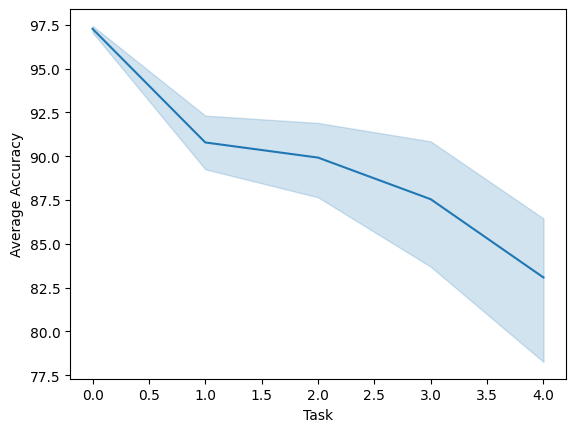

In [42]:
sns.lineplot( data_rere,  x='Task', y='Average Accuracy')

In [43]:
data_rere.groupby(['Approach', 'Task']).mean().apply(lambda x: round(x, 2))

Average Accuracy  Average Forgetting
Approach Task                                      
ReReLRP  0                97.27                 NaN
         1                90.79                3.71
         2                89.92                1.85
         3                87.55                1.24
         4                83.08                0.93

In [44]:
path_lwm = '/home/karokaro/research-repositories/FACIL/results/svhn_joint_final_svhn_new'

In [45]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(path_lwm) if isfile(join(path_lwm, f))]
onlyfiles

['stdout-2025-01-18-18-52.txt',
 'raw_log-2025-01-18-18-52.txt',
 'stderr-2025-01-18-19-06.txt',
 'stderr-2025-01-18-18-52.txt',
 'stderr-2025-01-18-18-43.txt',
 'stderr-2025-01-18-19-13.txt',
 'raw_log-2025-01-18-19-13.txt',
 'args-2025-01-18-19-13.txt',
 'stdout-2025-01-18-19-29.txt',
 'args-2025-01-18-18-26.txt',
 'stderr-2025-01-18-18-34.txt',
 'stdout-2025-01-18-19-21.txt',
 'args-2025-01-18-18-59.txt',
 'args-2025-01-18-19-21.txt',
 'raw_log-2025-01-18-18-43.txt',
 'stderr-2025-01-18-19-29.txt',
 'stdout-2025-01-18-18-34.txt',
 'args-2025-01-18-19-06.txt',
 'stderr-2025-01-18-18-26.txt',
 'raw_log-2025-01-18-18-34.txt',
 'raw_log-2025-01-18-19-21.txt',
 'raw_log-2025-01-18-18-59.txt',
 'raw_log-2025-01-18-18-26.txt',
 'raw_log-2025-01-18-19-06.txt',
 'stdout-2025-01-18-19-13.txt',
 'stdout-2025-01-18-18-43.txt',
 'stderr-2025-01-18-19-21.txt',
 'args-2025-01-18-19-29.txt',
 'stdout-2025-01-18-18-26.txt',
 'stderr-2025-01-18-18-59.txt',
 'args-2025-01-18-18-34.txt',
 'stdout-2025-

In [46]:
args = [file for file in onlyfiles if 'args' in file ]
len(args)

9

In [47]:
import json
arg_dict = {}
for file in args:
    with open(join(path_lwm, file), 'r') as f:
        # regex time! we need only the timestamp of the file
        name = file.split('args-')[1]
        arg_dict[name] = json.loads(f.read())

In [48]:
import json

logs = [file for file in onlyfiles if 'raw_log' in file ]

res_dict = {}
for file in logs:
    with open(join(path_lwm, file), 'r') as f:
        name = file.split('raw_log-')[1]
        res_dict[name] = []
        for line in f:
            res_dict[name].append(json.loads(line.strip()))

In [49]:
import numpy as np
seeds = [0, 1, 2]
for seed in seeds:
    small = [key for key in arg_dict if arg_dict[key]["seed"]==seed]
    arg_means = {key:[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in [4]] for key in small}
    max_key = max(arg_means, key=arg_means.get)
    small.remove(max_key)
    for key in small:
        res_dict.pop(key)
        arg_dict.pop(key)

In [50]:
import pandas as pd
import numpy as np
from itertools import chain
data_joint = pd.DataFrame({'Approach': list(chain.from_iterable([['Joint' for i in range(5)] for key in res_dict.keys()])),
                     'Task': list(chain.from_iterable([[i for i in range(5)] for key in res_dict.keys()])),
                     'Average Accuracy': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_taw" and k["group"]=="test" and k["task"] == i]) for i in range(5)] for key in res_dict.keys()])),
                     'Average Forgetting': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="forg_taw" and k["group"]=="test" and k["task"] == i and k["iter"] != k["task"]]) for i in range(5)] for key in res_dict.keys()]))})

/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


<Axes: xlabel='Task', ylabel='Average Accuracy'>

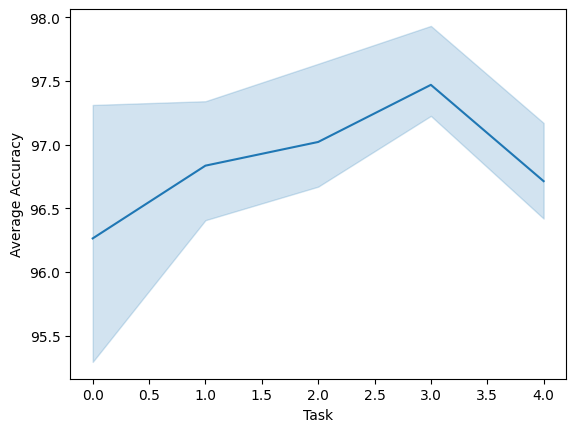

In [51]:
sns.lineplot( data_joint,  x='Task', y='Average Accuracy')

In [52]:
data_joint.groupby(['Approach', 'Task']).mean().apply(lambda x: round(x, 2))

Average Accuracy  Average Forgetting
Approach Task                                      
Joint    0                96.26                 NaN
         1                96.83               -1.74
         2                97.02               -0.18
         3                97.47               -0.15
         4                96.71               -0.11

In [53]:
data_all = pd.concat([data, data_ewc, data_icarl, data_rere, data_joint, data_lwm], ignore_index=True)

/tmp/ipykernel_40711/2032208471.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.lineplot( data_all, hue='Approach', x='Task', y='Average Accuracy', hue_order=hue_order, ci=None)


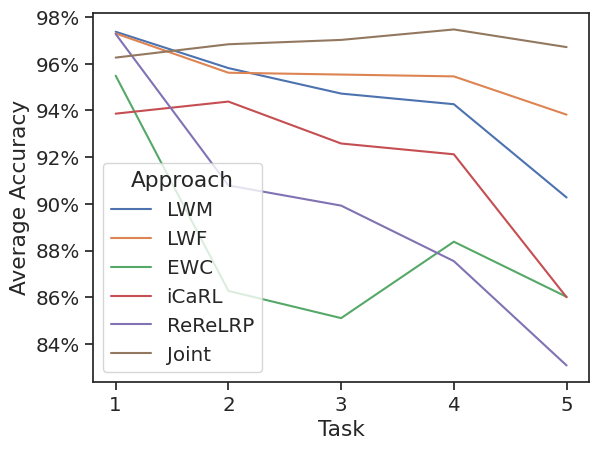

In [54]:
import matplotlib.pyplot as plt
hue_order = ["LWM", "LWF", "EWC", "iCaRL", "ReReLRP", "Joint"]
paletter = sns.color_palette("colorblind", 6)
sns.set_theme(style="ticks", font_scale=1.3) 
g = sns.lineplot( data_all, hue='Approach', x='Task', y='Average Accuracy', hue_order=hue_order, ci=None)
g.set_xticks(range(5))
g.set_xticklabels([i+1 for i in range(5)])
import matplotlib.ticker as mtick
g.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
plt.savefig("svhn_taw.pdf", format='pdf', bbox_inches='tight')